**NAME**
: De Guzman, Aero Kent D.

**COURSE/SECTION**
: CPE311/CPE22S3

**DATE CREATED**
: 04/13/2025

**DATE SUBMITTED**
: 04/13/2025

**INSTRUCTOR**
: Engr. Roman Richard

**Procedures:**

9.4 Introduction to Seaborn\
9.5 Formatting Plots\
9.6 Customizing Visualizations

**Data Analysis:**

Provide comments on output from the procedures.

In the given procedures, it was further clarified under each respective modules how to further utilize the visualization and plotting capabilities as well as discussing
an additional visualization module which is seaborne. Seaborne or SNS which is another visualization module similar to the functions and capabilities of both pyplot
and pandas plot but with an addition of having the ability of being able to plot both further complicated calculations, it is similar in a sense of pyplot such that while
pyplot focuses more on the visuals seaborne also focuses in its ability to return a visualization derived from complicated calculations. More modifications can be made
with seaborne such as more kinds of visualizations as well as orientations which is why it can output what I would describe a very beautiful and mesmerizing outputs in
my own opinion. To simply put, while pandas plot is a best of all worlds where it is a sufficient alternative when you both need a quick visualization that is already
functional as is, Seaborne is an improvement which a bit more complicated and different syntax which has the ability to return more complex visualization whilst matplot
pyplot is a framework wherein it can enchance the capabilities of the two when used together but can also work sufficiently by itself.

Additionally, in the overall procedures, it was also discussed under each of them on how to further organize and modify a graphed plot of any kind in order to both suit
the current necessity of a specific analysis as well as can aid in further clarifying what needed to be understood by further categorizing and editing the plotted graph.
This can be seen by further elaborating on the possible parameters that can be added such as adding further transperancy on the output to further differentiate and even
prettify these values.

**Supplementary Activity:**

Using the CSV files provided and what we have learned so far in this module complete the following exercises:

1. Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the magType of mb.
2. Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. Be sure to use the quantile() method on the data to make this easier. (Pick whichever orientation you prefer for the plot, but make sure to use subplots.)
3. Fill in the area between the bounds in the plot from exercise #2.
4. Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31', which marks the large decline in Facebook price on a line plot of the closing price.
5. Using the Facebook stock price data, annotate the following three events on a line plot of the closing price:
* Disappointing user growth announced after close on July 25, 2018
* Cambridge Analytica story breaks on March 19, 2018 (when it affected the market)
* FTC launches investigation on March 20, 2018
6. Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

quakes = pd.read_csv('datasets/earthquakes-1.csv')
quakes.head()

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California


<Axes: >

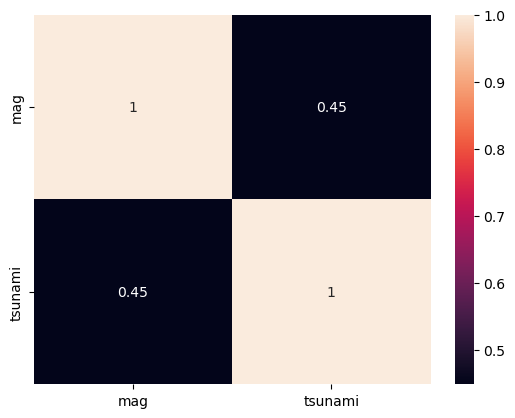

In [22]:
# 1. Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the magType of mb.
df1 = quakes[quakes['magType'] == 'mb'].copy()
sns.heatmap(df1[['mag','tsunami']].corr(), annot = True)

      close    volume
0    181.42  18151903
1    184.67  16886563
2    184.33  13880896
3    186.85  13574535
4    188.28  17994726
..      ...       ...
246  124.06  22066002
247  134.18  39723370
248  134.52  31202509
249  133.20  22627569
250  131.09  24625308

[251 rows x 2 columns]


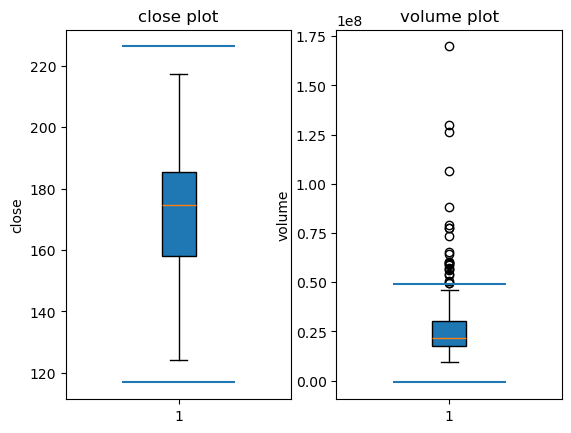

In [24]:
# 2. Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will
# be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. Be sure to use the quantile() method on the data to make this easier. (Pick whichever orientation you prefer for the plot,
# but make sure to use subplots.)

fb  = pd.read_csv('datasets/fb_stock_prices_2018.csv')
df2 = fb[['close','volume']].copy()
print(df2)

# preparing the total axes/plots to use, 2 since there will only be two columns
fig, axes = plt.subplots(nrows=1, ncols=2)

for i in range(len(df2.columns)):
    # plotting the boxplots first                           # --------------------------------------------------------------------
    axes[i].boxplot(df2[df2.columns[i]], patch_artist=True) # 3. Fill in the area between the bounds in the plot from exercise #2.
    axes[i].set_title(f'{df2.columns[i]} plot')             # patch_artist=True fills this bounds.
    axes[i].set_ylabel(df2.columns[i])                      # https://matplotlib.org/stable/gallery/statistics/boxplot_color.html#:~:text=patch_artist%3DTrue%2C%20%20%23%20fill%20with%20color
                                                            # --------------------------------------------------------------------

    # calculating the values to insert for the reference lines
    Q1, Q3 = df2[df2.columns[i]].quantile([0.25, 0.75])
    lower = Q1 - 1.5 * ( Q3 - Q1 )
    upper = Q3 + 1.5 * ( Q3 - Q1 )

    # hlines() 'horizontal lines' is used in order to graph a reference lines onto the plots,
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hlines.html
    axes[i].hlines([lower,upper], xmin=0.75, xmax=1.25)
    
plt.show()

In [26]:
# 3. Fill in the area between the bounds in the plot from exercise #2.
# this was already shown alongside the #2 example, see the comments it changed.

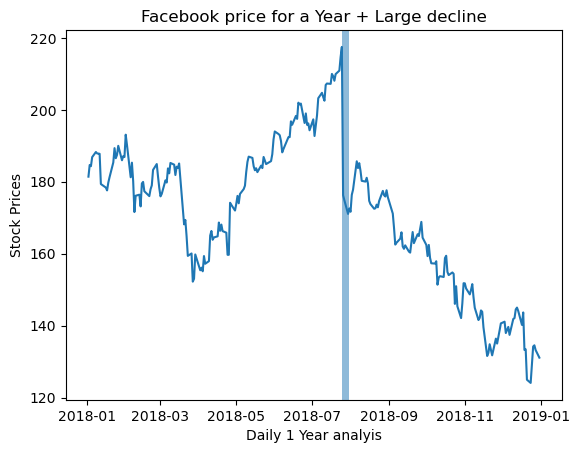

In [28]:
# 4. Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31', which marks the large decline in Facebook price on a line plot of the closing price.
df4 = fb.copy()
df4.date = pd.to_datetime(df4.date)
df4.set_index('date', inplace = True)
plt.plot(df4.index, df4['close'])

plt.axvspan('2018-07-25','2018-07-31', alpha = 0.5)
plt.xlabel('Daily 1 Year analyis')
plt.ylabel('Stock Prices')
plt.title('Facebook price for a Year + Large decline')
plt.show()

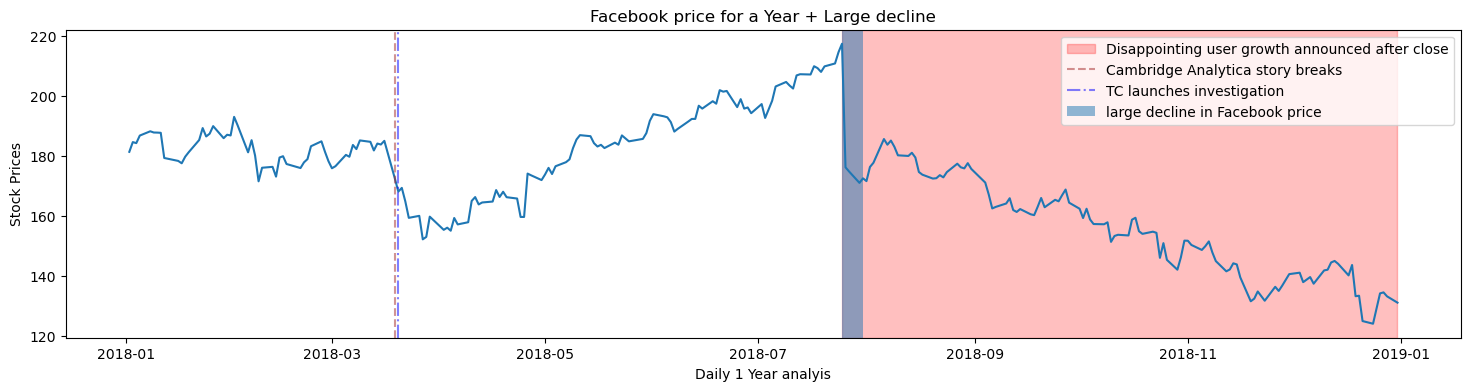

In [30]:
# 5. Using the Facebook stock price data, annotate the following three events on a line plot of the closing price:
df5 = fb.copy()
df5.date = pd.to_datetime(df5.date)
df5.set_index('date', inplace = True)
plt.figure(figsize=(18, 4))
plt.plot(df5.index, df5['close'])

# 5.1 Disappointing user growth announced after close on July 25, 2018                 >> 2018-07-25
plt.axvspan('2018-07-25', df5.index.max(), alpha = 0.25, color = 'red', label = 'Disappointing user growth announced after close')

# Used axvline() since we are plotting specifics points rather than a range.
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline

# 5.2 Cambridge Analytica story breaks on March 19, 2018 (when it affected the market) >> 2018-03-19
plt.axvline(pd.to_datetime('2018-03-19'),
            alpha = 0.50,
            color = 'brown',
            linestyle = '--',
            label = 'Cambridge Analytica story breaks')

# 5.3 TC launches investigation on March 20, 2018                                      >> 2018-03-20
plt.axvline(pd.to_datetime('2018-03-20'),
            alpha = 0.50,
            color = 'blue',
            linestyle = '-.',
            label = 'TC launches investigation')

plt.axvspan('2018-07-25','2018-07-31', alpha = 0.5, label = 'large decline in Facebook price')
plt.xlabel('Daily 1 Year analyis')
plt.ylabel('Stock Prices')
plt.title('Facebook price for a Year + Large decline')
plt.legend(loc = 'upper right')
plt.show()

C:\Users\uSerr\AppData\Local\Temp\ipykernel_16552\3741377585.py:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set1') # 182 is the max/total available colormaps


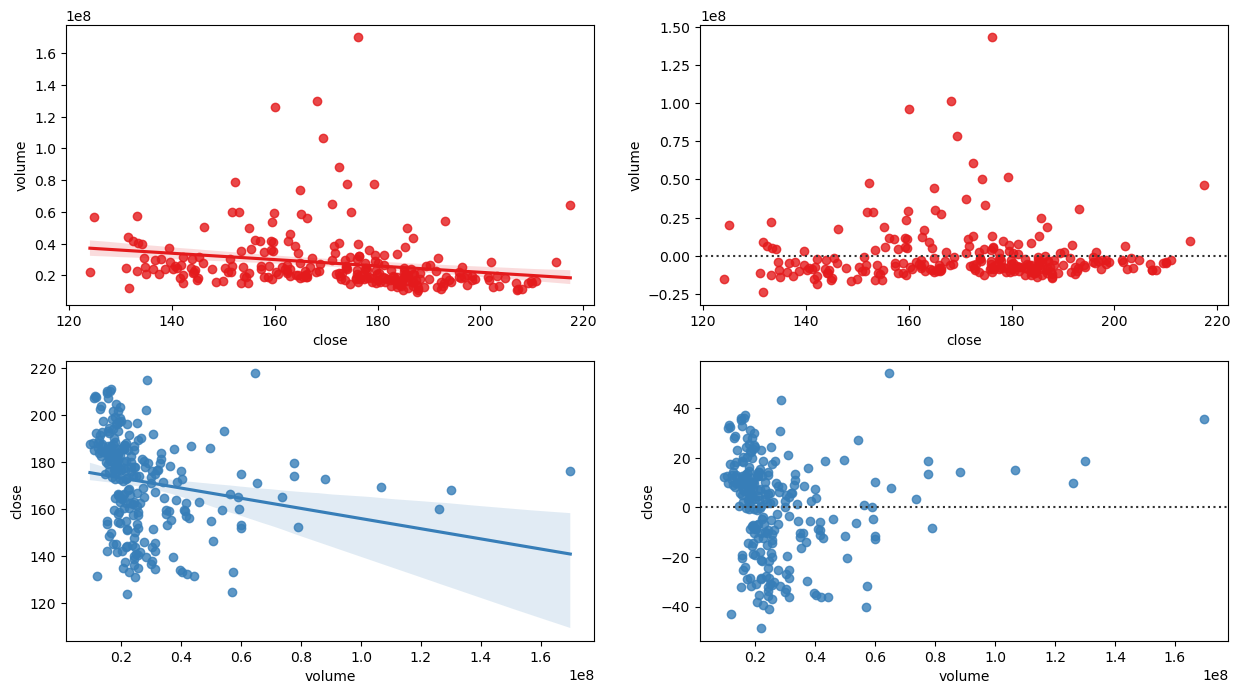

In [249]:
# 6. Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors.
# Remember, for this use case, we should pick a qualitative colormap or make our own.

# >> below is the snippet of the entire function for the reg_resid_plots()

# import itertools

# import matplotlib.pyplot as plt
# import seaborn as sns

# def reg_resid_plots(data):
#     """
#     Using seaborn, plot the regression and residuals
#     plots side-by-side for every permutation of 2 columns 
#     in the data.
    
#     Parameters:
#         - data: A pandas DataFrame

#     Returns:
#         A matplotlib Figure object.
#     """
#     num_cols = data.shape[1]
#     permutation_count = num_cols * (num_cols - 1)

#     fig, ax = plt.subplots(permutation_count, 2, figsize=(15, 8))

#     for (x, y), axes, color in zip(
#         itertools.permutations(data.columns, 2), 
#         ax,
#         itertools.cycle(['royalblue', 'darkorange'])
#     ):
#         for subplot, func in zip(axes, (sns.regplot, sns.residplot)):
#             func(x=x, y=y, data=data, ax=subplot, color=color)
#     plt.close()
#     return fig

import itertools
import matplotlib.pyplot as plt
# https://matplotlib.org/stable/api/cm_api.html >> to utilize the colormaps for iterations
import matplotlib.cm as cm
import seaborn as sns

def custom_regress_reside_plots(data):
    num_cols = data.shape[1]
    permutation_count = num_cols * (num_cols - 1)

    fig, ax = plt.subplots(permutation_count, 2, figsize = (15,8))

    cmap = cm.get_cmap('Set1')
    for (x,y), axes, color in zip(itertools.permutations(data.columns, 2),
                                  ax,             # colormap( range located on i % colormap(total))
                                  itertools.cycle([cmap(i % cmap.N) for i in range(permutation_count)]) # only modified this part
                                 ):                                                                     # since it is the one that 
        for subplot, func in zip(axes, (sns.regplot, sns.residplot)):                                   # is being asked to modify.
            func(x=x, y=y, data=data, ax=subplot, color=color)
    plt.close()
    return fig

custom_regress_reside_plots(df2)

**Summary/Conclusion:**

* Provide a summary of your learnings and the conclusion for this activity.

To conclude the current activity, it was an elaboration on the visualization capabilities of the of the modules under pandas, pyplot, and seaborne. Seaborne was further
assimilated and utilized in addition with this activity compared to the previous one where the activity now demonstrates and discusses the different possibilities and
parameters than can be utilized to further enchance and reach a more specific analysis and output. Referencing the supplementary, the plots under the procedures were
applied based on what is being asked such as the usage of a heatmap from the seaborne module which is a plot that is useful in visualizing the frequency and density of 
the things that was fed or applied using it. A further complicated variation of a boxplot can also be examined to make use of its visualization capabilities by in addition
to calculating and visualizing the distributions of the fed, data an addition function of an hline() was used which, while was not discussed in the procedures, can still
be found on the documentations as can be seen with the commented link which functions by adding a horizontal line which is also the one being asked on the activity. Something
similar to this lines was also discussed such as the use axvspan and line which enables the highlighting capabilities towards a graph by providing the ability to highlight
a specific range or a single point for a speicific analysis.

All in all, the current activity discussed and accomplished was all about the further capabilities and parameters of the provided visualization modules where in each
procedures and activity, it was discussed and implemented the given techniques in order to further analyze and arrive on a specific conclusion.